In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
stats = pd.read_csv('Seasons_Stats.csv', index_col=0)

In [3]:
stats['Year']

0        1950.0
1        1950.0
2        1950.0
3        1950.0
4        1950.0
          ...  
24686    2017.0
24687    2017.0
24688    2017.0
24689    2017.0
24690    2017.0
Name: Year, Length: 24691, dtype: float64

In [4]:
salaries = pd.read_csv('2017-18_NBA_salary.csv')

In [5]:
salaries.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [6]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           485 non-null    object 
 1   Salary           485 non-null    int64  
 2   NBA_Country      485 non-null    object 
 3   NBA_DraftNumber  485 non-null    int64  
 4   Age              485 non-null    int64  
 5   Tm               485 non-null    object 
 6   G                485 non-null    int64  
 7   MP               485 non-null    int64  
 8   PER              485 non-null    float64
 9   TS%              483 non-null    float64
 10  3PAr             483 non-null    float64
 11  FTr              483 non-null    float64
 12  ORB%             485 non-null    float64
 13  DRB%             485 non-null    float64
 14  TRB%             485 non-null    float64
 15  AST%             485 non-null    float64
 16  STL%             485 non-null    float64
 17  BLK%            

In [7]:
stats_2017 = stats[stats['Year']==2017]

In [8]:
data_all = pd.merge(stats_2017, salaries[['Player','Salary']], how='inner', left_on='Player', right_on='Player')

In [9]:
data_all.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,0.560,...,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0,5725000
1,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,0.565,...,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0,1709538
2,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,0.355,...,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0,1709538
3,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,0.587,...,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0,1709538
4,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,0.589,...,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0,22471910


In [10]:
data_all.dropna(axis=1, thresh = int(0.5*data_all.shape[0])+1, inplace=True)

In [11]:
data_all.dropna(axis=0, inplace=True)

In [12]:
data_all.drop_duplicates(subset=['Player'], keep='first',inplace=True)

In [13]:
df = data_all[['Year', 'Player', 'Pos', 'Age', 'G', 'MP', 'PER','TRB', 'AST', 'STL', 'BLK','PTS','Salary']]

In [14]:
def new_columns(columns):
    new_columns = [column +'/G' for column in columns]
    return new_columns
    

In [15]:
columns = ['MP','TRB', 'AST', 'STL', 'BLK','PTS']

In [16]:
new_columns = new_columns(columns)

In [17]:
for i,j in zip(new_columns, columns):
    df[i] = df[j]/df['G']

df.drop(columns, axis=1, inplace=True)


C:\Users\mateu\AppData\Local\Temp/ipykernel_4352/68641102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[j]/df['G']
C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df.sort_values('PTS/G', ascending=False, inplace=True)
df.head(10)

C:\Users\mateu\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Year,Player,Pos,Age,G,PER,Salary,MP/G,TRB/G,AST/G,STL/G,BLK/G,PTS/G
435,2017.0,Russell Westbrook,PG,28.0,81.0,30.6,28530608,34.592593,10.666667,10.370370,1.641975,0.382716,31.580247
176,2017.0,James Harden,PG,27.0,81.0,27.3,28299399,36.382716,8.135802,11.185185,1.481481,0.456790,29.086420
407,2017.0,Isaiah Thomas,PG,27.0,76.0,26.5,6261395,33.802632,2.697368,5.907895,0.921053,0.171053,28.934211
103,2017.0,Anthony Davis,C,23.0,75.0,27.5,23775506,36.106667,11.813333,2.093333,1.253333,2.226667,27.986667
111,2017.0,DeMar DeRozan,SG,27.0,74.0,24.0,27739975,35.405405,5.216216,3.918919,1.054054,0.175676,27.297297
264,2017.0,Damian Lillard,PG,26.0,75.0,24.1,26153057,35.920000,4.906667,5.853333,0.906667,0.266667,26.986667
92,2017.0,DeMarcus Cousins,C,26.0,72.0,25.7,18063850,34.236111,11.069444,4.611111,1.388889,1.277778,26.972222
219,2017.0,LeBron James,SF,32.0,74.0,27.0,33285709,37.756757,8.648649,8.729730,1.243243,0.594595,26.405405
257,2017.0,Kawhi Leonard,SF,25.0,74.0,27.5,18868625,33.432432,5.810811,3.513514,1.783784,0.743243,25.513514
101,2017.0,Stephen Curry,PG,28.0,79.0,24.6,34682550,33.392405,4.468354,6.620253,1.810127,0.215190,25.303797


In [19]:
df['Salary']=df['Salary']/1000000

C:\Users\mateu\AppData\Local\Temp/ipykernel_4352/3497850020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary']=df['Salary']/1000000


In [20]:
df.head()

,Year,Player,Pos,Age,G,PER,Salary,MP/G,TRB/G,AST/G,STL/G,BLK/G,PTS/G
435,2017.0,Russell Westbrook,PG,28.0,81.0,30.6,28.530608,34.592593,10.666667,10.370370,1.641975,0.382716,31.580247
176,2017.0,James Harden,PG,27.0,81.0,27.3,28.299399,36.382716,8.135802,11.185185,1.481481,0.456790,29.086420
407,2017.0,Isaiah Thomas,PG,27.0,76.0,26.5,6.261395,33.802632,2.697368,5.907895,0.921053,0.171053,28.934211
103,2017.0,Anthony Davis,C,23.0,75.0,27.5,23.775506,36.106667,11.813333,2.093333,1.253333,2.226667,27.986667
111,2017.0,DeMar DeRozan,SG,27.0,74.0,24.0,27.739975,35.405405,5.216216,3.918919,1.054054,0.175676,27.297297


In [21]:
y_target = "Salary"
features = [feature for feature in df.columns if feature not in (y_target,'Year','Pos','Player')]
features

['Age', 'G', 'PER', 'MP/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'PTS/G']

In [22]:
X = df[features]
y = df[[y_target]]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

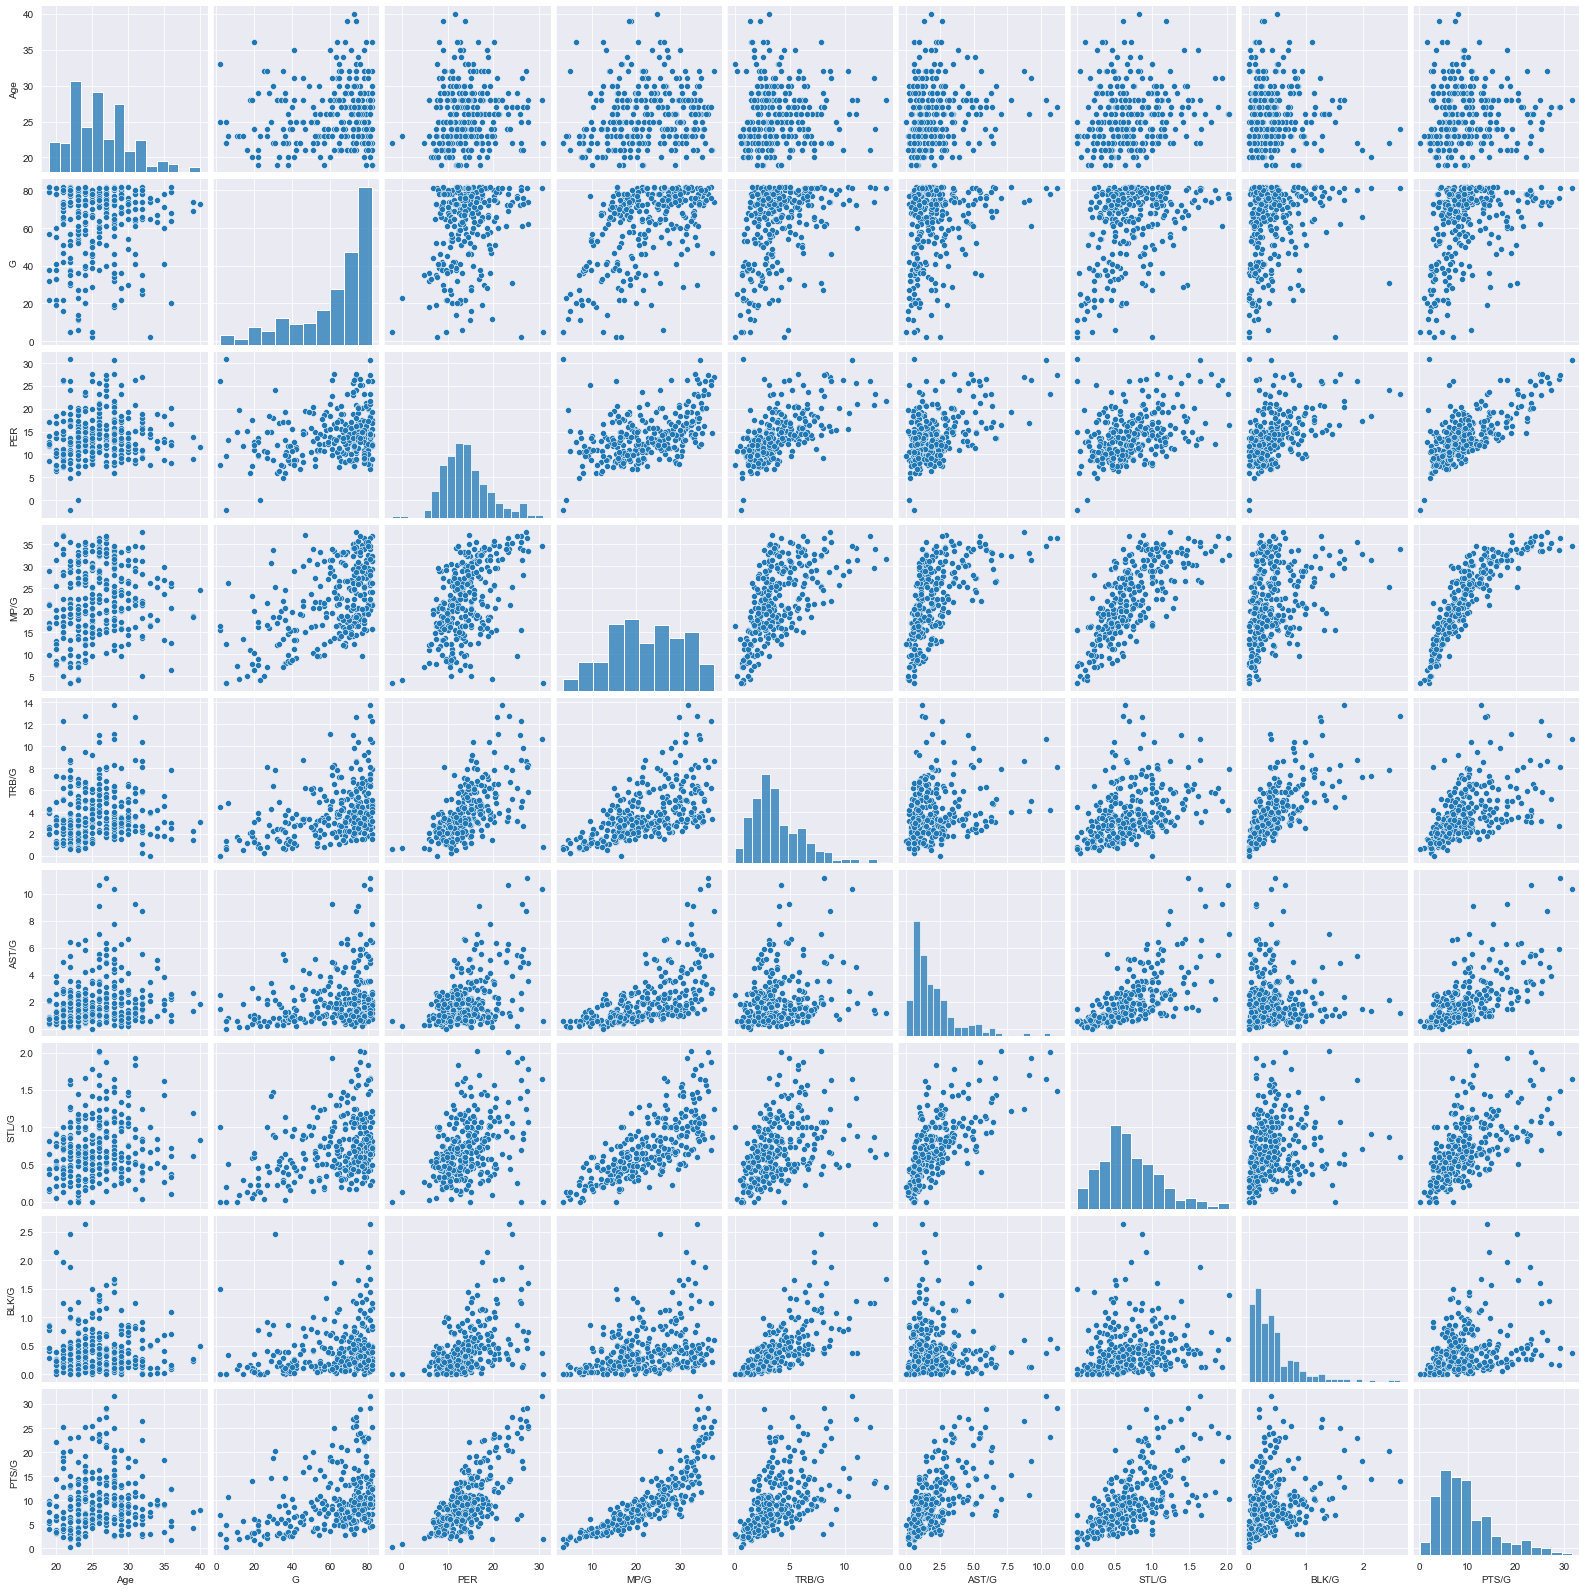

In [25]:
sns.pairplot(X_train)

In [26]:
corr = df.corr()

In [27]:
corr

,Year,Age,G,PER,Salary,MP/G,TRB/G,AST/G,STL/G,BLK/G,PTS/G
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,0.138884,0.116014,0.277652,0.167091,0.091147,0.156352,0.117125,-0.025809,0.105974
G,NaN,0.138884,1.000000,0.282164,0.380780,0.535128,0.380502,0.247890,0.398006,0.234259,0.406996
PER,NaN,0.116014,0.282164,1.000000,0.557015,0.498145,0.608426,0.475217,0.425649,0.465311,0.733392
Salary,NaN,0.277652,0.380780,0.557015,1.000000,0.685293,0.539644,0.502338,0.511720,0.310441,0.712756
MP/G,NaN,0.167091,0.535128,0.498145,0.685293,1.000000,0.601661,0.605720,0.729930,0.338389,0.850491
TRB/G,NaN,0.091147,0.380502,0.608426,0.539644,0.601661,1.000000,0.220109,0.414017,0.693586,0.544909
AST/G,NaN,0.156352,0.247890,0.475217,0.502338,0.605720,0.220109,1.000000,0.650438,0.009556,0.643390
STL/G,NaN,0.117125,0.398006,0.425649,0.511720,0.729930,0.414017,0.650438,1.000000,0.212193,0.604984
BLK/G,NaN,-0.025809,0.234259,0.465311,0.310441,0.338389,0.693586,0.009556,0.212193,1.000000,0.301758


In [28]:
corr[y_target][features]

Age      0.277652
G        0.380780
PER      0.557015
MP/G     0.685293
TRB/G    0.539644
AST/G    0.502338
STL/G    0.511720
BLK/G    0.310441
PTS/G    0.712756
Name: Salary, dtype: float64

<AxesSubplot:>

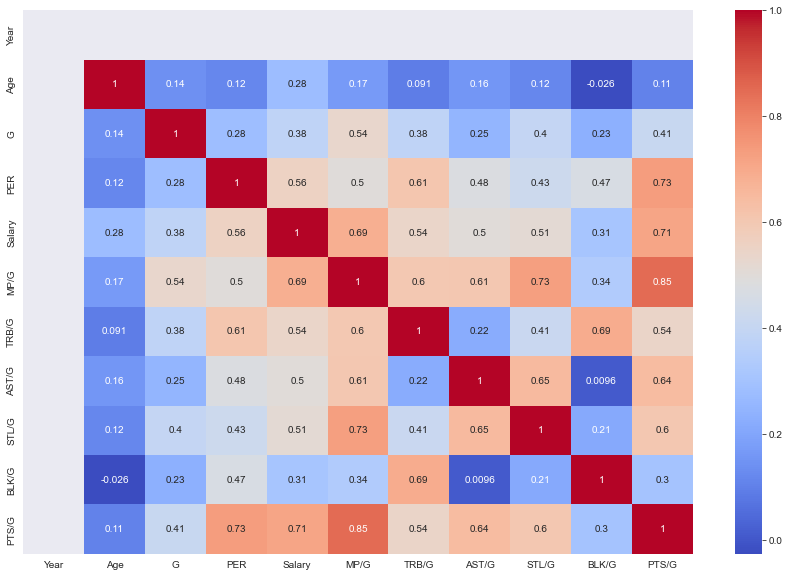

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

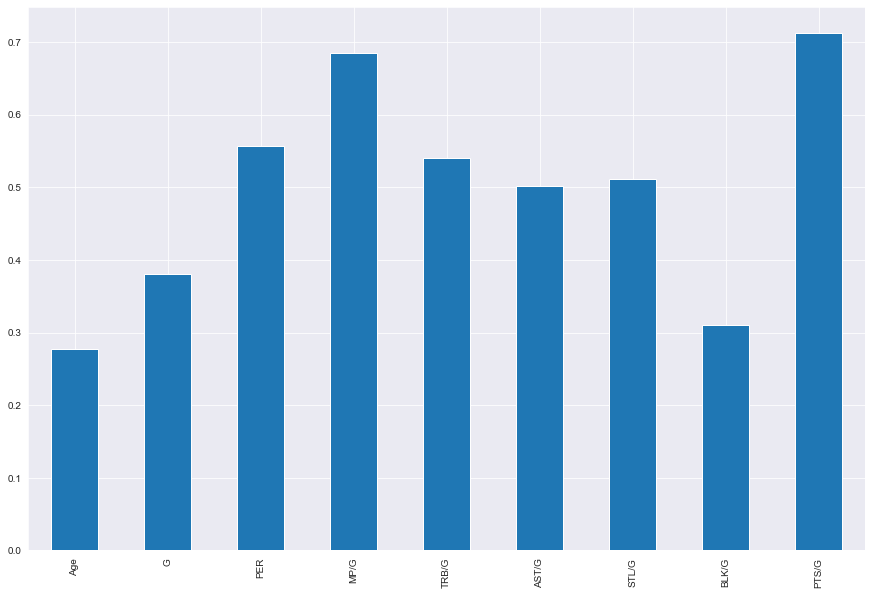

In [30]:
corr[y_target][features].plot.bar()

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model_1 = LinearRegression()

In [34]:
model_1.fit(X_train, y_train)

LinearRegression()

In [35]:
model_1.coef_.shape

(1, 9)

In [36]:
coef = model_1.coef_

In [37]:
new_coef = coef.reshape(9,1)

In [38]:
coeffecients = pd.DataFrame(new_coef,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Age,0.373228
G,0.013766
PER,0.002712
MP/G,0.140714
TRB/G,0.536460
AST/G,0.153797
STL/G,-0.382752
BLK/G,-0.418856
PTS/G,0.535141


In [39]:
predict = model_1.predict(X_test)

<AxesSubplot:ylabel='Count'>

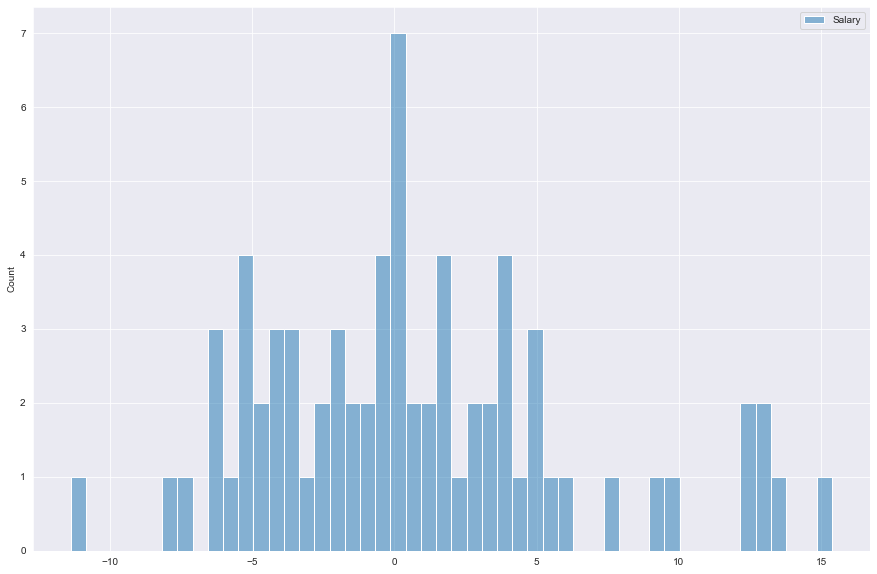

In [40]:
sns.histplot((y_test-predict),bins=50)

Text(0, 0.5, 'Predicted Y')

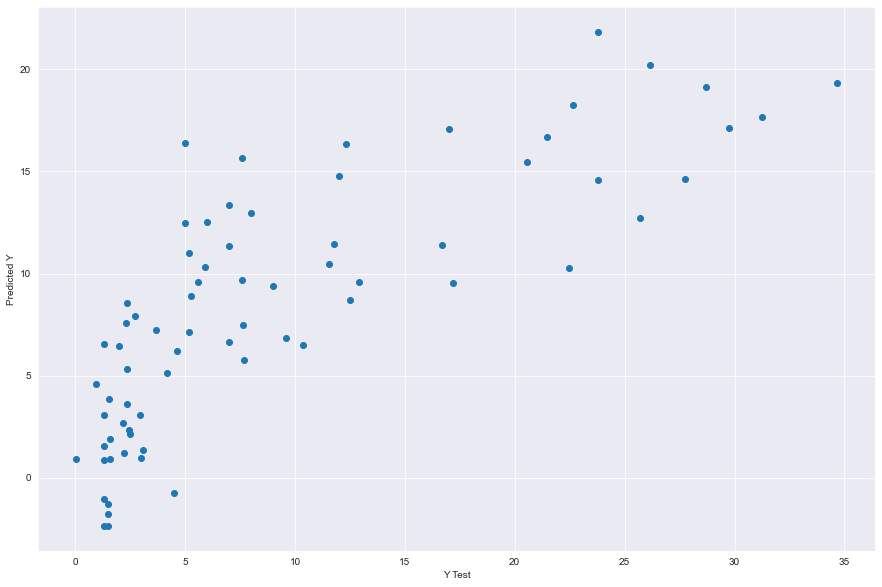

In [41]:
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
model_1_score = mean_squared_error(y_true=y_test, y_pred=predict)
model_1_score

31.429107548946902

In [44]:
dummy_mean = float(df[y_target].mean())
dummy_pred = y.copy()
dummy_pred[y_target] = dummy_mean

In [45]:
model_d_score = round(mean_squared_error(y, y_pred=dummy_pred), 2)
model_d_score

60.92

In [46]:
print("Nasz nowy model jest", round(model_d_score / model_1_score, 2), "razy lepszy niż prognoza naiwna")

Nasz nowy model jest 1.94 razy lepszy niż prognoza naiwna


In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 4.216306359793599
MSE: 31.429107548946902
RMSE: 5.606166921252604


In [49]:
# przypisanie X (macierz cech/atrybutów) oraz y (etykieta, zmienna zależna)
X = df[features]
y = df[[y_target]]

In [50]:
from sklearn.metrics          import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score)
from sklearn.model_selection  import KFold, ParameterGrid
from sklearn.model_selection  import LeaveOneOut

In [51]:
def get_scores(model, X_test, y_true):
  y_pred = model.predict(X_test)
  scores = [
      mean_absolute_error(y_true=y_true, y_pred=y_pred),              # MAE
      mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred),   # MAPE
      mean_squared_error(y_true=y_true, y_pred=y_pred),               # MSE
      mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False) # RMSE
  ]
  return scores

In [52]:

model_2 = DecisionTreeRegressor()

dt_params = {
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [0.01, 0.05, 0.10, 0.20],
    "max_features": ["auto", "sqrt", "log2"]
}

dt_params_grid = list(ParameterGrid(dt_params))

In [53]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

dt_scores = []

for combination in range(len(dt_params_grid)):

  model = model_2

  model.set_params(
      criterion         = "mse",
      random_state      = 42,
      min_samples_leaf  = 3,
      max_depth         = dt_params_grid[combination]["max_depth"],
      min_samples_split = dt_params_grid[combination]["min_samples_split"],
      max_features      = dt_params_grid[combination]["max_features"])
  
  
  print('Current Iteration:', dt_params_grid[combination])

  cv_scores = []

  for train, test in cv.split(X_train, y_train):
    
    
    X_tcv, y_tcv = X_train.iloc[train], y_train.iloc[train]
    X_val, y_val = X_train.iloc[test], y_train.iloc[test]

    
    model.fit(X=X_tcv, y=y_tcv)
    model_scores = get_scores(model=model, X_test=X_val, y_true=y_val)
    cv_scores.append(model_scores)

  model_scores_df = pd.DataFrame(cv_scores)

  cv_scores_final = list(model_scores_df.mean()) + list(model_scores_df.std())
  print('Mean RMSE:', round(cv_scores_final[3], 2), '\n')
  dt_scores.append(cv_scores_final)


Current Iteration: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 0.01}
Mean RMSE: 5.16 

Current Iteration: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 0.05}
Mean RMSE: 5.14 

Current Iteration: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 0.1}
Mean RMSE: 5.14 

Current Iteration: {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 0.2}
Mean RMSE: 5.28 

Current Iteration: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.01}
Mean RMSE: 5.81 

Current Iteration: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.05}
Mean RMSE: 5.85 

Current Iteration: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.1}
Mean RMSE: 5.86 

Current Iteration: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 0.2}
Mean RMSE: 6.11 

Current Iteration: {'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 0.01}
Mean RMSE: 5.81 

Current Iteration: {'max_depth': 3, 'max_features': 'log2',

In [54]:
df_params = pd.DataFrame(dt_params_grid)
df_scores = pd.DataFrame(dt_scores)
df_scores.columns = ['mean_MAE', 'mean_MAPE', 'mean_MSE', 'mean_RMSE', 'sd_MAE', 'sd_MAPE', 'sd_MSE', 'sd_RMSE']
df_res_dt = pd.concat([df_params, df_scores], axis=1)

In [55]:
df_res_dt[df_res_dt.mean_RMSE==df_res_dt.mean_RMSE.min()]

,max_depth,max_features,min_samples_split,mean_MAE,mean_MAPE,mean_MSE,mean_RMSE,sd_MAE,sd_MAPE,sd_MSE,sd_RMSE
2,3,auto,0.1,3.654518,1.609048,26.540643,5.137483,0.434158,0.596116,4.253083,0.42853


In [58]:
model_2 = DecisionTreeRegressor(
    criterion="mse",
    random_state=1,
    min_samples_leaf=3,
    max_depth=dt_params_grid[2]["max_depth"],
    min_samples_split=dt_params_grid[2]["min_samples_split"],
    max_features=dt_params_grid[2]["max_features"])

model_2.fit(X=X_train, y=y_train)


preds=model_2.predict(X_test)
model_2_score = round(mean_squared_error(y_true=y_test, y_pred=preds))

In [59]:
print("Nasz nowy model jest", round(model_d_score / model_2_score, 2), "razy lepszy niż prognoza naiwna")

Nasz nowy model jest 2.44 razy lepszy niż prognoza naiwna


In [60]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 3.5834133458677857
MSE: 25.175118948089207
RMSE: 5.017481335101229


Text(0, 0.5, 'Predicted Y')

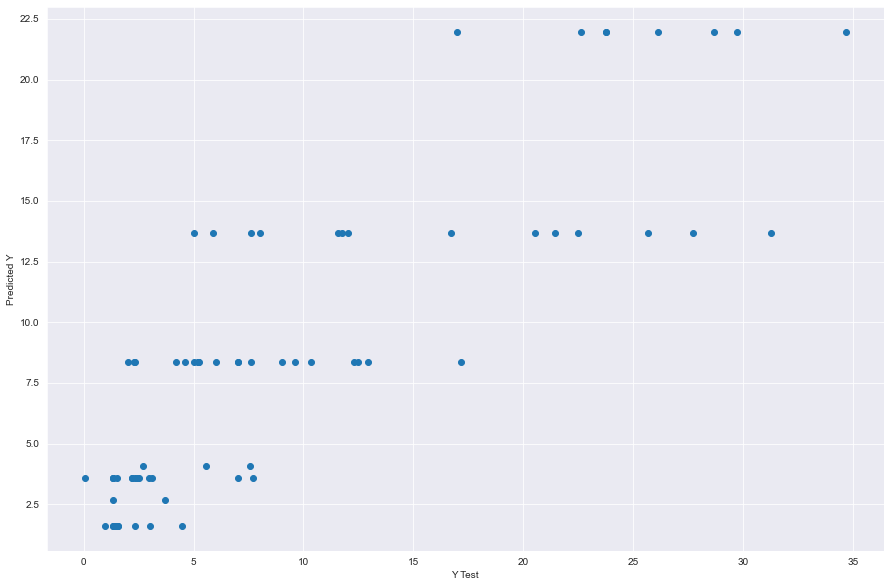

In [69]:
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')